**Chapter_2e**  
**ATMOS 5040: Environmental Programming and Statistics**  
**John Horel and Derek Mallia**

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/johnhorel/ATMOS_5040_2020.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

# Chapter 2e

get time series of wind speed and direction from WBB for May 2020 in csv format

documentation on how that was done from Synoptic api services
http://synopticdata.com

https://api.synopticdata.com/v2/stations/timeseries?&token=52c25c7d57f341d489c45720202b313f&start=202005010600&end=202006010559&obtimezone=local&output=csv&stid=wbb&vars=wind_speed,wind_direction,wind_gust

returns a csv file with 8 header lines that are skipped 
4 columns: station_id, date(YYYY-MM-DDTHH:MM:SS-0600), wind speed (m/s) direction, wind gust(m/s)

Another decent resource on pandas
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [3]:
#need to parse the date string
#this will be really useful later for just about any time you mess with datestrings
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z')
#there are times with no actual values (direction blank and wind speed and gust 0)
#those will get changed to NaN by the read_csv function
headers = ['STID','Date', 'Speed', 'Direction', 'Gust']
dtypes = {'STID': 'str','Date': 'str', 'Speed': 'float', 'Direction': 'float', 'Gust': 'float'}

df = pd.read_csv('../data/mtmet_may_2020.txt', parse_dates=['Date'], date_parser=dateparse, \
                 names=headers,dtype = dtypes,na_filter=True,skiprows=8)

print(df)
# times are local (MDT)

        STID                      Date  Speed  Direction   Gust
0      MTMET 2020-05-01 00:00:00-06:00  1.300      70.38  1.720
1      MTMET 2020-05-01 00:01:00-06:00  1.470      76.77  1.740
2      MTMET 2020-05-01 00:02:00-06:00  1.140      66.02  1.390
3      MTMET 2020-05-01 00:03:00-06:00  0.780      56.24  1.040
4      MTMET 2020-05-01 00:04:00-06:00  0.680      47.73  0.820
5      MTMET 2020-05-01 00:05:00-06:00  0.720      76.38  0.920
6      MTMET 2020-05-01 00:06:00-06:00  0.840      84.90  1.080
7      MTMET 2020-05-01 00:07:00-06:00  0.780      88.70  1.040
8      MTMET 2020-05-01 00:08:00-06:00  1.300      86.40  1.650
9      MTMET 2020-05-01 00:09:00-06:00  1.660      77.60  1.920
10     MTMET 2020-05-01 00:10:00-06:00  2.130      80.70  2.920
11     MTMET 2020-05-01 00:11:00-06:00  2.730      74.14  3.100
12     MTMET 2020-05-01 00:12:00-06:00  2.860      72.51  3.150
13     MTMET 2020-05-01 00:13:00-06:00  2.780      65.42  3.390
14     MTMET 2020-05-01 00:14:00-06:00  

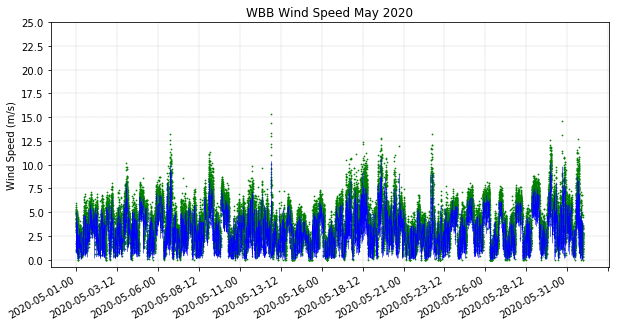

In [4]:
#plot time series of wind speed during May 2020
DATES = np.array([datetime.strftime(i, '%Y-%m-%d-%H') for i in df['Date']])
fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.plot(DATES, df['Speed'],color='blue',linewidth=.3)
plt.scatter(DATES, df['Gust'], color = 'green',marker='.',s=2)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(16)) #set the number of x axis ticks. (without this it will plot every tick mark)
plt.gcf().autofmt_xdate() #get a nice date format for the x axis (makes it look neat)
ax.set(ylabel='Wind Speed (m/s)')
ax.set_yticks(np.arange(0,27.5,step=2.5))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set_title('WBB Wind Speed May 2020')

plt.savefig('figure_2.12_2020.png')

In [5]:
#some basic info + output precentiles
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)
#note that there are "missing" blank wind directions and those values have 0 wind speed and gust
#so the counts of direction are lower than for speed. it is critical to remove those rows
#remove rows with a NaN in any column
df=df.dropna()
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)
#now the number of rows is the same

              Speed     Direction          Gust
count  44640.000000  44521.000000  44640.000000
mean       2.800581    148.283182      3.759161
std        1.612980    109.597510      1.993459
min        0.000000      0.000000      0.000000
1%         0.140000      3.182000      0.410000
10%        0.854000     37.190000      1.330000
25%        1.510000     54.110000      2.200000
33%        1.830000     59.510000      2.610000
50%        2.560000     88.300000      3.510000
66%        3.430000    220.700000      4.530000
75%        3.972000    248.900000      5.134000
90%        5.040000    309.100000      6.430000
99%        6.850000    356.400000      9.090000
max       10.760000    360.000000     15.360000
              Speed     Direction          Gust
count  44521.000000  44521.000000  44521.000000
mean       2.808066    148.283182      3.769206
std        1.608613    109.597510      1.986617
min        0.005000      0.000000      0.020000
1%         0.190000      3.182000      0

In [6]:
#What were the top 10 peak wind speed values and when?
df1=df.sort_values(by='Speed', ascending=False)   
print(df1.iloc[:10:,])
#Times are local (MDT)

        STID                      Date   Speed  Direction    Gust
26837  MTMET 2020-05-19 15:17:00-06:00  10.760       9.00  12.780
17204  MTMET 2020-05-12 22:44:00-06:00  10.350      26.77  14.420
41753  MTMET 2020-05-29 23:53:00-06:00  10.201      63.35  12.089
41754  MTMET 2020-05-29 23:54:00-06:00  10.181      68.22  11.879
17188  MTMET 2020-05-12 22:28:00-06:00  10.120      13.60  15.360
8334   MTMET 2020-05-06 18:54:00-06:00   9.950      21.98  12.230
42835  MTMET 2020-05-30 17:55:00-06:00   9.790     269.10  13.149
8333   MTMET 2020-05-06 18:53:00-06:00   9.790      12.43  11.310
17189  MTMET 2020-05-12 22:29:00-06:00   9.710      18.55  13.380
8336   MTMET 2020-05-06 18:56:00-06:00   9.690      27.60  12.600


In [7]:
#What were the top 10 peak wind gusts values and when?
df1=df.sort_values(by='Gust', ascending=False)   
print(df1.iloc[:10:,])

        STID                      Date   Speed  Direction    Gust
17188  MTMET 2020-05-12 22:28:00-06:00  10.120      13.60  15.360
42834  MTMET 2020-05-30 17:54:00-06:00   9.600     250.80  14.579
17204  MTMET 2020-05-12 22:44:00-06:00  10.350      26.77  14.420
17189  MTMET 2020-05-12 22:29:00-06:00   9.710      18.55  13.380
31335  MTMET 2020-05-22 18:15:00-06:00   7.722     352.50  13.252
8339   MTMET 2020-05-06 18:59:00-06:00   9.340      21.52  13.230
42835  MTMET 2020-05-30 17:55:00-06:00   9.790     269.10  13.149
17201  MTMET 2020-05-12 22:41:00-06:00   8.630       8.46  12.990
26837  MTMET 2020-05-19 15:17:00-06:00  10.760       9.00  12.780
44185  MTMET 2020-05-31 16:25:00-06:00   7.094     259.60  12.722


# Figure 2.13 Statistics on Wind Speed and Direction


44521


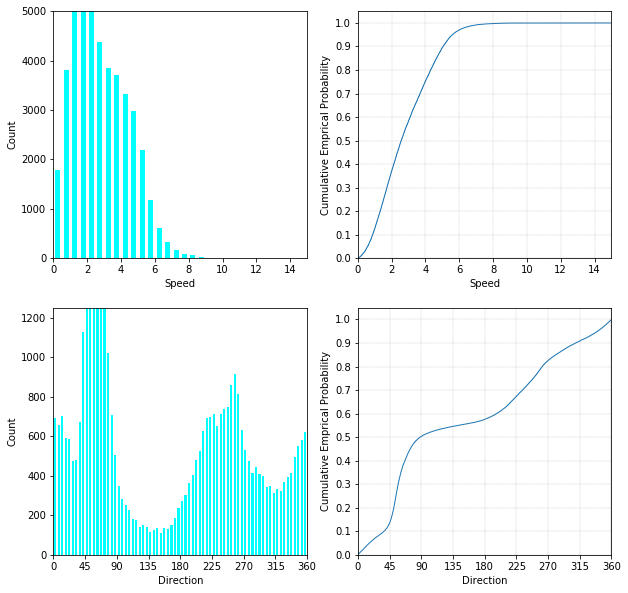

In [8]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
x1 = np.arange(0.,15.5,.5)
hist_val1,bins1 = np.histogram(df['Speed'].values,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(0,15),ylim=(0,5000))
ax1.set(xlabel="Speed",ylabel='Count')

x2 = np.arange(0,365,5)
hist_val2,bins2 = np.histogram(df['Direction'].values,bins=x2,range=(x2.min(),x2.max()))
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
ax2 = ax[1,0]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(0,360),ylim=(0,1250))
ax2.set_xticks(np.arange(0,365,step=45))
ax2.set(xlabel="Direction",ylabel='Count')


#get total number of values
shape = df.shape
n_bins = shape[0]
print(n_bins)
ax3 = ax[0,1]
n, bins, patches = ax3.hist(df['Speed'].values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x1.min(),x1.max()))

ax3.set(xlabel="Speed",ylabel='Cumulative Emprical Probability')
ax3.set(xlim=(x1.min(),x1.max()))
ax3.set_xticks(np.arange(0,16,step=2))
ax3.set_yticks(np.arange(0, 1.1, step=0.10))
ax3.grid(linestyle='--', color='grey', linewidth=.2)

ax4 = ax[1,1]
n, bins, patches = ax4.hist(df['Direction'].values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x2.min(),x2.max()))

ax4.set(xlabel="Direction",ylabel='Cumulative Emprical Probability')
ax4.set(xlim=(x2.min(),x2.max()))
ax4.set_xticks(np.arange(0,365,step=45))
ax4.set_yticks(np.arange(0, 1.1, step=0.10))
ax4.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.13_2020.png')

In [9]:
#convert spd,dir to u,v. python- 0 angle is relative to x axis and then counterclockwise
pid = np.pi/180.
u = df['Speed'] * np.sin(pid*(df['Direction'] - 180));
v = df['Speed'] * np.cos(pid*(df['Direction'] - 180));
#add to dataframe the zonal and meridional values
df['u']= u.values
df['v']= v.values
#print(u)
#note that u and v computed for times when no missing data
basic_vals = df.describe(percentiles=[.01,.10,.25,.33,.50,.66,.75,.90,.99])
print(basic_vals)

              Speed     Direction          Gust             u             v
count  44521.000000  44521.000000  44521.000000  44521.000000  44521.000000
mean       2.808066    148.283182      3.769206     -0.749293     -0.823866
std        1.608613    109.597510      1.986617      2.331436      1.948649
min        0.005000      0.000000      0.020000     -9.454233    -10.627527
1%         0.190000      3.182000      0.489000     -5.325937     -5.268355
10%        0.870000     37.190000      1.350000     -3.832933     -3.138237
25%        1.520000     54.110000      2.210000     -2.750351     -2.227892
33%        1.837000     59.510000      2.610000     -2.073334     -1.772088
50%        2.560000     88.300000      3.529000     -0.505490     -0.855753
66%        3.440000    220.700000      4.548000      0.477461     -0.076887
75%        3.980000    248.900000      5.134000      0.991554      0.351867
90%        5.040000    309.100000      6.430000      2.162393      1.576114
99%        6

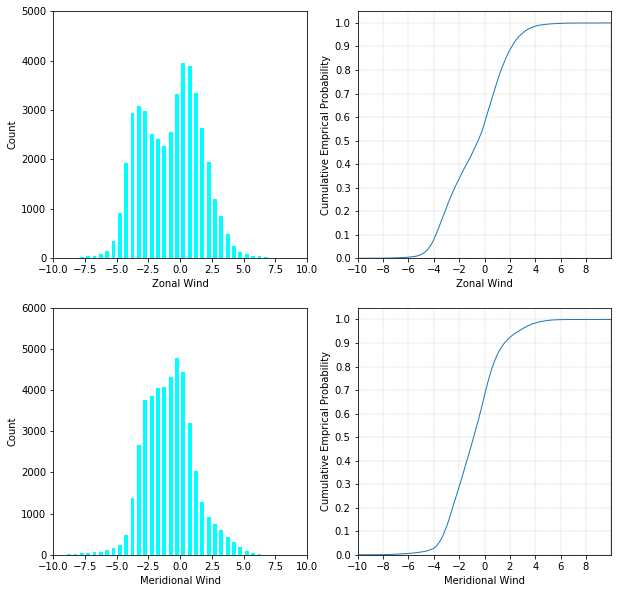

In [10]:
#plotting zonal and meridional wind statistics
fig,ax = plt.subplots(2,2,figsize=(10,10))
x1 = np.arange(-10.,10.5,.5)
hist_val1,bins1 = np.histogram(u.values,bins=x1,range=(x1.min(),x1.max()))
width1 = 0.6 * (bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:]) / 2
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(-10,10),ylim=(0,5000))
ax1.set(xlabel="Zonal Wind",ylabel='Count')

x2 = np.arange(-10,10.5,.5)
hist_val2,bins2 = np.histogram(v.values,bins=x2,range=(x2.min(),x2.max()))
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
ax2 = ax[1,0]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(-10,10),ylim=(0,6000))
ax2.set(xlabel="Meridional Wind",ylabel='Count')

ax3 = ax[0,1]
n, bins, patches = ax3.hist(u.values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x1.min(),x1.max()))

ax3.set(xlabel="Zonal Wind",ylabel='Cumulative Emprical Probability')
ax3.set(xlim=(x1.min(),x1.max()))
ax3.set_xticks(np.arange(-10,10,step=2))
ax3.set_yticks(np.arange(0, 1.1, step=0.10))
ax3.grid(linestyle='--', color='grey', linewidth=.2)


ax4 = ax[1,1]
n, bins, patches = ax4.hist(v.values, n_bins, density='True', histtype='step', \
                           cumulative=True, label='Empirical', range=(x2.min(),x2.max()))

ax4.set(xlabel="Meridional Wind",ylabel='Cumulative Emprical Probability')
ax4.set(xlim=(x2.min(),x2.max()))
ax4.set_xticks(np.arange(-10,10,step=2))
ax4.set_yticks(np.arange(0, 1.1, step=0.10))
ax4.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.14_2020.png')

In [11]:
#some other statistics
#switch Dataframe to array
winda = df[['Speed','Direction','Gust','u','v']].values
#print(winda)
modes = stats.mode(winda,axis=0)
print(modes)

# unbiased estimate of pop standard deviation and variance
std0 = np.std(winda,ddof=1,axis=0)
var0 = np.var(winda,ddof=1,axis=0)
print('pop standard deviation and variance',std0,var0)
# sample standard deviation and variance
std1 = np.std(winda,axis=0)
var1 = np.var(winda,axis=0)
print('pop standard deviation and variance',std1,var1)
#skewness
skew = stats.skew(winda,axis=0)
print('skewness',skew)



ModeResult(mode=array([[  2.3       , 220.4       ,   3.02      ,   0.        ,
         -3.06265021]]), count=array([[127,  27, 201,  11,   3]]))
pop standard deviation and variance [  1.6086134  109.59751021   1.98661731   2.3314362    1.94864889] [2.58763706e+00 1.20116142e+04 3.94664833e+00 5.43559477e+00
 3.79723249e+00]
pop standard deviation and variance [  1.60859533 109.59627935   1.986595     2.33141002   1.948627  ] [2.58757894e+00 1.20113444e+04 3.94655968e+00 5.43547268e+00
 3.79714720e+00]
skewness [0.53574052 0.42046761 0.59104168 0.00426003 0.24884891]


# Wind Rose

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

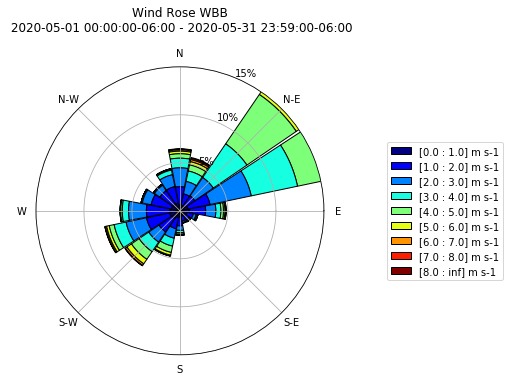

In [12]:
# use code created by Brian Blaylock that was adapted from other open source windrose code
from windrose import WindroseAxes

#get first and last dates for label
firsttime = df.Date.iloc[0]
lasttime = df.Date.iloc[-1]
#print(firsttime,lasttime)


fig = plt.figure(figsize=(5, 10), facecolor='w', edgecolor='w')
rect = [0.1, 0.1, 0.8, 0.8]
#the critical part to get polar coordinate
ax = WindroseAxes(fig, rect)
fig.add_axes(ax)

#wind direction is "x" and wind speed is "y"
ax.bar(winda[:,1], winda[:,0],
           bins=[0, 1, 2, 3, 4, 5, 6, 7, 8],
           nsector=16,
           normed=True,
           opening=.95,
           edgecolor='k')
#the above causes some warning diagnostics that I will ignore!
l = ax.legend()
plt.setp(l.get_texts())
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), prop={'size':10})
plt.title("Wind Rose WBB\n %s - %s\n" % (firsttime,lasttime))
plt.grid(True)
plt.yticks(np.arange(0, 105, 5))
ax.set_yticklabels(['', '5%', '10%', '15%', '20%', '25%', '30%', '', '40%'])
ax.set_rmax(15)
plt.savefig("figure_2.15_2020.png")

# Resultant vs Mean Wind



% compute resultant wind speed for each hour
ressp = sqrt(um.*um+vm.*vm);
hrlbl = 0:1:23;
figure(15)
hold on
plot(hrlbl,spm,'r')
plot(hrlbl,ressp,'g')
axis([0 23 0 5])
xlabel('Hour of day');
ylabel('Wind Speed (m/s)');
title('WBB Mean and Resultant Wind Speed: John Horel 12/26/2018');


In [13]:
#one of the nice features of pandas. group in this case by time of day
diurnal_wind=df.groupby([df["Date"].dt.hour]).mean()
print(diurnal_wind)
ds=diurnal_wind['Speed'].values
du=diurnal_wind['u'].values
dv=diurnal_wind['v'].values
#compute resultant wind speed for each hour
ressp = np.sqrt(du*du+dv*dv)
print(ds,ressp)

         Speed   Direction      Gust         u         v
Date                                                    
0     3.692391   80.777134  4.660583 -2.492818 -1.757239
1     3.454585   80.462959  4.424232 -2.365211 -1.435858
2     3.260294   86.082002  4.213455 -2.188121 -1.370711
3     3.165435   85.556791  4.077494 -2.158356 -1.392176
4     3.141232   90.581806  4.046018 -2.203446 -1.130420
5     3.273753   83.815195  4.176722 -2.389355 -1.390272
6     3.111426   85.595083  3.987960 -2.144518 -1.408421
7     2.382287   99.535116  3.119393 -1.495348 -0.931040
8     1.746479  161.114817  2.388431 -0.334805  0.020841
9     1.607979  207.960575  2.273148  0.515509  0.332088
10    1.906369  226.275838  2.734118  0.942832  0.301312
11    2.084854  228.706618  2.996211  1.253226  0.483929
12    2.286648  234.883156  3.344293  1.335380  0.570700
13    2.489522  233.026385  3.667317  1.297534  0.401027
14    2.609196  228.050038  3.809261  1.253966  0.199661
15    2.619651  226.968725  3.8

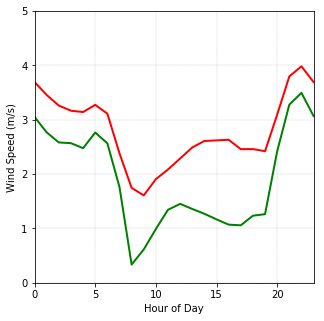

In [14]:
#plot mean wind speed vs resultant wind speed
fig15,ax = plt.subplots(1,1,figsize=(5,5),facecolor='w', edgecolor='w')
xd = np.arange(0,24)
ax.plot(xd,ds,color='red',linewidth=2);
ax.plot(xd,ressp,color='green',linewidth=2);
ax.set(xlim=(0,23),ylim=(0,5))
ax.set(xlabel="Hour of Day",ylabel='Wind Speed (m/s)')
ax.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.16_2020.png')